# 2 - COMPUTER VISION - Perspective Transform
    The aim of this program is to perform perspective transform of  a Stop Sign

In [36]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt 

In [37]:
img = mpimg.imread("images/perspective_transform/StopSign_perspective.PNG")
plt.imshow(img)

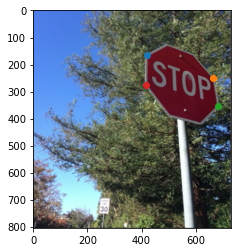

In [34]:
%matplotlib inline

top_left = [420, 164]
top_right = [665, 250]
bottom_right = [685, 353]
bottom_left = [415, 276]

plt.imshow(img)
plt.plot(top_left[0], top_left[1], '.', markersize=12)
plt.plot(top_right[0], top_right[1], '.', markersize=12)
plt.plot(bottom_right[0], bottom_right[1], '.', markersize=12)
plt.plot(bottom_left[0], bottom_left[1], '.', markersize=12)
plt.show()

In [39]:
# Define perspective transform function
def warp(img):

    # Define calibration box in source (original) and destination (desired or warped) coordinates
    img_size = (img.shape[1], img.shape[0])

    # Source coordinates
    top_left = [420, 164]
    top_right = [665, 250]
    bottom_right = [685, 353]
    bottom_left = [415, 276]

    src = np.float32(
        [top_right,
        bottom_right,
        bottom_left,
        top_left])
    
    # Destination coordinates (using your eyes, find rectangle)
    dst = np.float32(
        [[665, 250],
        [665, 350],
        [415, 350],
        [415, 250]])
    
    # Compute prespective transofrm - M
    M = cv2.getPerspectiveTransform(src, dst)

    #Could compute inverse by swaping the params
    Minv = cv2.getPerspectiveTransform(dst, src)

    # Create warped image - use linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped

In [43]:
%matplotlib inline

img = mpimg.imread("images/perspective_transform/StopSign_perspective.PNG")

warped_im = warp(img)

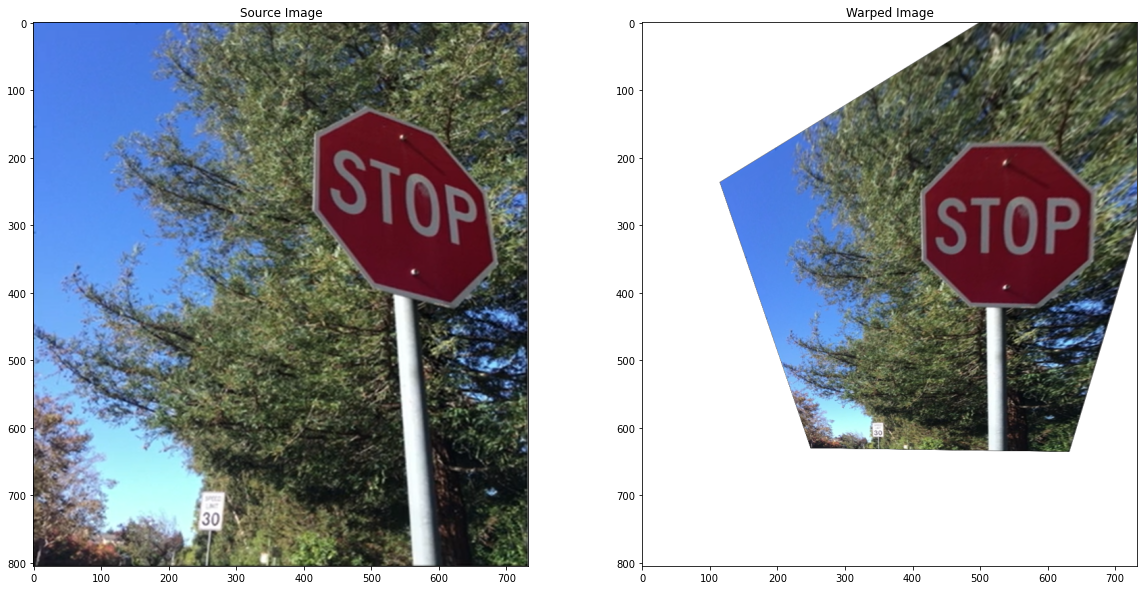

In [44]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title("Source Image")
ax1.imshow(img)
ax2.set_title("Warped Image")
ax2.imshow(warped_im)
